## GROUP 2 

#### *Members:* 

1. Diego Alonso Gómez (20171738)
2. Alex Raul Pacheco (......)

# *QUESTION 1*


### *Parte A*

Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. Examples of correlated predictor variables (also called multicollinear predictors) are: a person’s height and weight, age and sales price of a car, or years of education and annual income. This problem can become a serious one when perfect multicollinearity occurs: it happens when an independent variable is a linear combination of two other independent variables.

For example:

$$ Investment_i = \beta_0+\beta_1GPD +\beta_2GovermentSpending +\beta_3Consumption+\beta_4Savings\epsilon_i$$

- Perfect multicollinearity will occur if we can express: $Savings = GPD − GovermentSpending - Consumption$
- In this case, $\beta_4$ will not be able to measure the effect of increasing the balance by keeping the export and import constant given their linear relationship.

- The main consequence is that we will not be able to find the following expression: $\beta_{OLS} = (X'X)^{−1}X'y$ ; that because $rango(X)<K ⇒ |X'X| = 0 ⇒ \not\exists (X'X)^{-1}$ where K in the number of variables.

### *Parte B*

In [36]:
gen_exact_collin_data = function(num_samples = 10) {
  x1 = rnorm(n = num_samples, mean = 80, sd = 10)
  x2 = rnorm(n = num_samples, mean = 70, sd = 5)
  x3 = rnorm(n = num_samples, mean = 50, sd = 5)
  x4 = rnorm(n = num_samples, mean = 40, sd = 15)
  x5 = rnorm(n = num_samples, mean = 40, sd = 15)
  x6 = rnorm(n = num_samples, mean = 90, sd = 25)
  x7 = rnorm(n = num_samples, mean = 80, sd = 10)
  x8 = rnorm(n = num_samples, mean = 30, sd = 5)
  x9 = rnorm(n = num_samples, mean = 45, sd = 10)  
  y = 3 + 2*x1 + 3*x2 + 5*x3 + 4*x4 +rnorm(n = num_samples, mean = 0, sd = 1)
  data.frame(x1, x2, x3, x4, x5, x6, x7, x8, x9, y)
}

In [37]:
set.seed(89)
exact_collin_data = gen_exact_collin_data()
dim(exact_collin_data)

[1] 10 10

In [38]:
head(exact_collin_data)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65.48398,70.48211,56.88620,12.12618,27.03509,78.85772,70.73151,31.34095,29.63396,679.1827
2,87.08100,65.19052,46.98707,11.31277,22.49027,102.18523,87.69954,21.54192,37.25546,651.8983
3,95.93097,68.42119,53.28274,44.51899,37.47390,63.68323,82.90495,25.51366,36.97835,845.2957
4,71.62404,69.95045,49.21460,38.60374,54.28510,116.42138,81.01467,26.32215,21.75862,757.0803
5,99.29470,74.42423,53.95678,27.13324,35.59235,58.64393,91.94221,34.86319,57.11855,803.7194
6,67.68930,73.52623,44.67050,32.48536,63.34984,114.01597,61.42266,19.32580,41.73535,711.2844


In [39]:
X <- matrix(exact_collin_data)

In [40]:
X <- exact_collin_data[, -which(names(exact_collin_data) == "y")] 

In [41]:
head(X)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65.48398,70.48211,56.88620,12.12618,27.03509,78.85772,70.73151,31.34095,29.63396
2,87.08100,65.19052,46.98707,11.31277,22.49027,102.18523,87.69954,21.54192,37.25546
3,95.93097,68.42119,53.28274,44.51899,37.47390,63.68323,82.90495,25.51366,36.97835
4,71.62404,69.95045,49.21460,38.60374,54.28510,116.42138,81.01467,26.32215,21.75862
5,99.29470,74.42423,53.95678,27.13324,35.59235,58.64393,91.94221,34.86319,57.11855
6,67.68930,73.52623,44.67050,32.48536,63.34984,114.01597,61.42266,19.32580,41.73535


In [42]:
Inv_X <- solve(X)
Inv_X

ERROR: Error in solve.default(X): 'a' (10 x 9) debe ser cuadrada


R shows us an error message because vector 10 of X is a linear combination of vector 1,2 and 3. This, obviously, will show us that X is a singular matrix, that is, that it has a 0 determinant, so it is not invertible. However, as we can see in the image, python can show us the inverse matrix of X even if it has the same characteristics as X en R and this is because the difference in packages betwen R and python. This last one has statical packages that can aproximate a inverse matrix even with these been singular matrixs.  

# *QUESTION 2*

##### 1. Replicate the results of the script analyzing_rct_reemployment_experiment both in Python and R. Follow the next instructions:

- Focus on the Treatment group 2
- Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1
- Run all specifications:
    * classical 2-sample approach, no adjustment (CL)
    * classical linear regression adjustment (CRA)
    * interactive regression adjustment (IRA)
    * interactive regression adjustment (IRA) using Lasso. I already fixed the problems in the Python code so please check again the Python script for the solution. For this now I used another package called hdmpy, you can see how to install it in this link. If you don´t want to use this package (which will give you the exact results as it is in R) just use the lasso from scikit-learn.

# Analyzing RCT data with Precision Adjustment

## Data

In this lab, our group will analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000). These type of experiments were conducted in 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

## Focus on the Treatment group 2

In [43]:
## loading the data
Data <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n <- dim(Data)[1]
p_1 <- dim(Data)[2]
Data<- subset(Data, tg==2 | tg==0)
attach(Data)

In [44]:
T2<- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [45]:
names(Data)

[1] "abdt"       "tg"         "inuidur1"   "inuidur2"   "female"    
 [6] "black"      "hispanic"   "othrace"    "dep"        "q1"        
[11] "q2"         "q3"         "q4"         "q5"         "q6"        
[16] "recall"     "agelt35"    "agegt54"    "durable"    "nondurable"
[21] "lusd"       "husd"       "muld"

##  Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

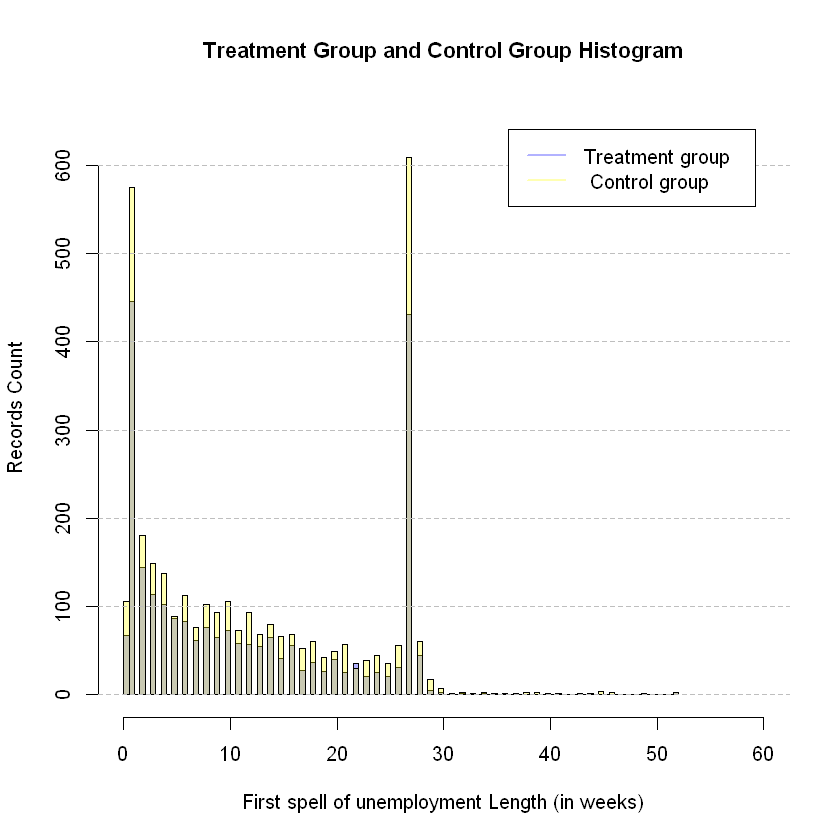

In [46]:
c1 <- rgb(0, 0, 1, 0.3) 
c2 <- rgb(1, 1, 0, 0.3)

hist(Data$inuidur2[Data$tg==2],ylim=c(0,650),xlim=c(0,60),xlab="First spell of unemployment Length (in weeks)"
     ,ylab="Records Count",col=c1,cex.main = 1.1,breaks=80, 
     main = "Treatment Group and Control Group Histogram")
hist(Data$inuidur2[Data$tg==0],breaks=80,add=T,col=c2)
grid(nx = NA, ny = NULL, lty = 2, col = "gray", lwd = 1)
legend("topright",
       inset = 0.05,
       legend = c("Treatment group", " Control group"),
       lty = c(1, 1),
       col = c(c1, c2),
       lwd = 2)

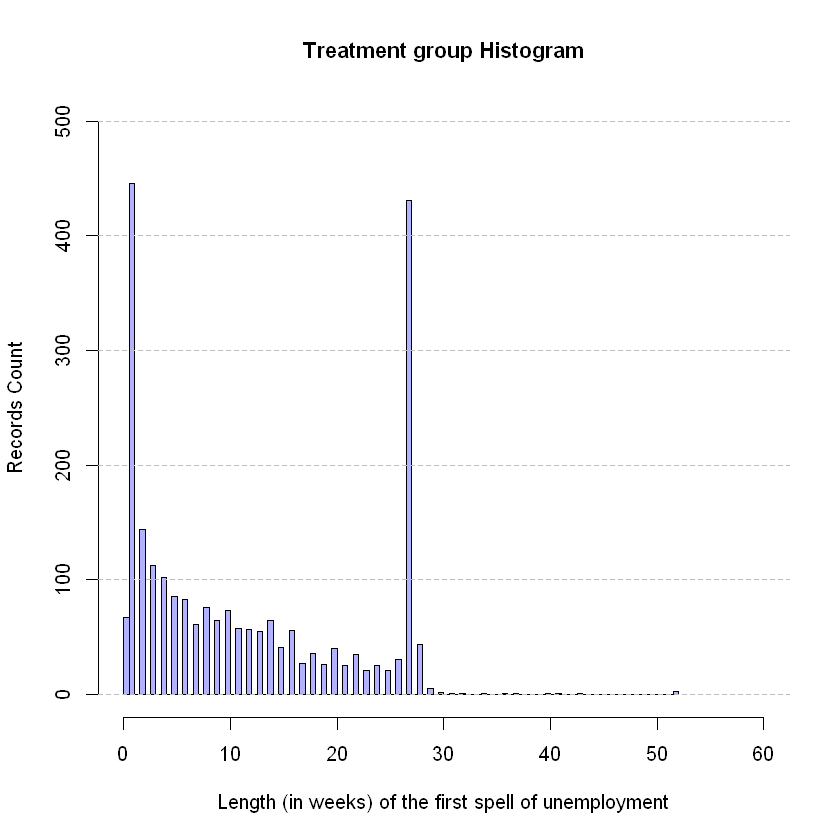

In [47]:
hist(Data$inuidur2[Data$tg==2],ylim=c(0,500),xlim=c(0,60),xlab="Length (in weeks) of the first spell of unemployment"
     ,ylab="Records Count",col=c1,cex.main = 1.1,breaks=80, main = "Treatment group Histogram")
grid(nx = NA, ny = NULL, lty = 2, col = "gray", lwd = 1)

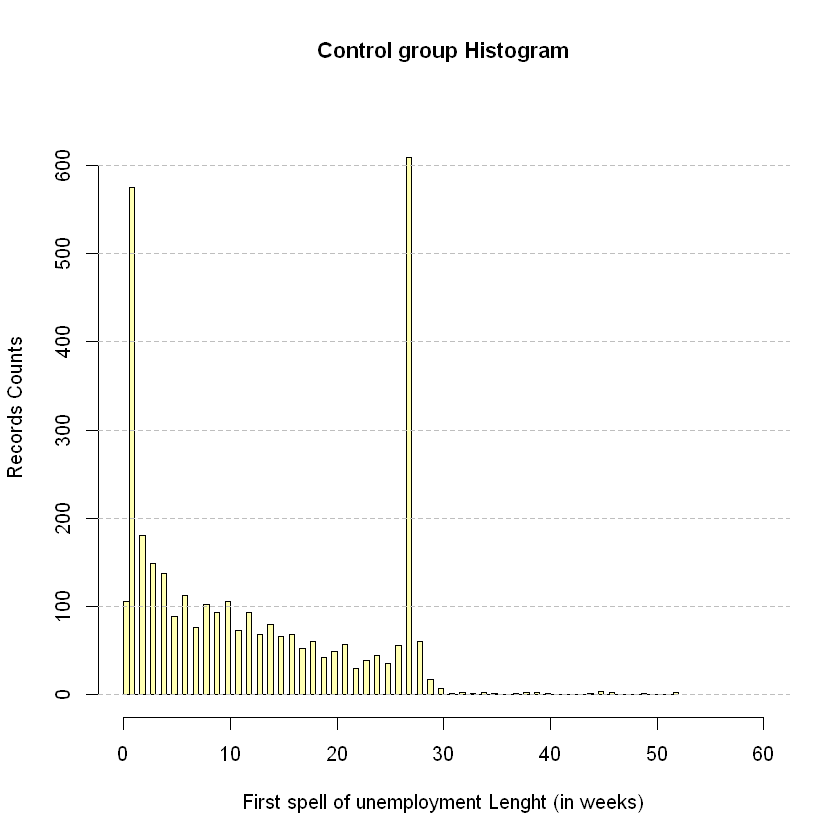

In [48]:
hist(Data$inuidur2[Data$tg==0],ylim=c(0,650),xlim=c(0,60),xlab="First spell of unemployment Lenght (in weeks)"
     ,ylab="Records Counts",col=c2,cex.main = 1.1,breaks=80, main = "Control group Histogram")
grid(nx = NA, ny = NULL, lty = 2, col = "gray", lwd = 1)

### Model 
To evaluate treatments' impact on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

# 1° *Carry out covariate balance check*

In [49]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
library(lmtest)
library(sandwich)
coeftest(m, vcov = vcovHC(m, type="HC1"))

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification

In [50]:
# Classical 2-sample approach, no adjustment (CL)
formula_cl <- log(inuidur1)~T2

# classical linear regression adjustment
formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
# Omitted dummies: q1, nondurable, muld
ols.cl <- lm(formula_cl)
ols.cra <- lm(formula_cra)

ols.cl = coeftest(ols.cl, vcov = vcovHC(ols.cl, type="HC1"))
ols.cra = coeftest(ols.cra, vcov = vcovHC(ols.cra, type="HC1"))


### *1° Forma: interactive regression adjustment (IRA)*

In [51]:
summary(lm(formula_cl)) 


Call:
lm(formula = formula_cl)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0568 -0.9582  0.3411  1.2001  1.9732 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.05683    0.02104  97.779   <2e-16 ***
T2TRUE      -0.07883    0.03246  -2.428   0.0152 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.218 on 5780 degrees of freedom
Multiple R-squared:  0.001019,	Adjusted R-squared:  0.0008463 
F-statistic: 5.897 on 1 and 5780 DF,  p-value: 0.0152


### *2° Forma: interactive regression adjustment (IRA)*

In [52]:
summary(lm(formula_cra)) 


Call:
lm(formula = formula_cra)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7486 -0.9882  0.3007  1.0086  2.2507 

Coefficients: (17 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.447183   0.381276   6.418 1.49e-10 ***
T2TRUE               -0.071207   0.032089  -2.219 0.026522 *  
female               -0.942805   0.313809  -3.004 0.002673 ** 
black                -0.665426   0.212970  -3.125 0.001790 ** 
othrace              -1.549455   0.990390  -1.564 0.117758    
factor(dep)1          0.279850   0.450985   0.621 0.534933    
factor(dep)2          0.167816   0.393591   0.426 0.669852    
q2                    0.027123   0.384918   0.070 0.943827    
q3                   -0.354237   0.383939  -0.923 0.356235    
q4                   -0.338024   0.384104  -0.880 0.378878    
q5                   -0.177717   0.382676  -0.464 0.642375    
q6                   -0.445604   0.381386  -1.168 0.242702  

### *3° Forma: interactive regression adjustment (IRA)*

In [53]:

#interactive regression model;

X = model.matrix (~ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1]
dim(X)
demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira, vcov = vcovHC(ols.ira, type="HC1"))
print(ols.ira)




[1] 5782  119


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [54]:
summary(lm(log(inuidur1) ~ T2*X) )


Call:
lm(formula = log(inuidur1) ~ T2 * X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7359 -0.9551  0.2982  0.9769  2.4639 

Coefficients: (37 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.055698   0.020776  98.947  < 2e-16 ***
T2TRUE                       -0.069904   0.032316  -2.163  0.03057 *  
Xfemale                      -0.666282   0.444834  -1.498  0.13424    
Xblack                       -0.863486   0.269929  -3.199  0.00139 ** 
Xothrace                     -3.817688   1.722167  -2.217  0.02668 *  
Xfactor(dep)1                 0.035926   0.685311   0.052  0.95819    
Xfactor(dep)2                 0.211756   0.497004   0.426  0.67008    
Xq2                          -0.254644   0.527073  -0.483  0.62902    
Xq3                          -0.621233   0.525592  -1.182  0.23727    
Xq4                          -0.479927   0.526303  -0.912  0.36187    
Xq5                     

### *4° Interactive regression adjustment (IRA) using Lasso*

In [55]:
#install.packages("hdm")

Installing package into 'C:/Users/Diego/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'hdm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\Rtmp6rsQ85\downloaded_packages


In [56]:
library(hdm)

T2 = demean(T2)

DX = model.matrix(~T2*X)[,-1]

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))


print(rlasso.ira)



[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




### Results

In [57]:
str(ols.ira)
ols.ira[2,1]

 'coeftest' num [1:203, 1:4] 2.0557 -0.0699 -0.6663 -0.8635 -3.8177 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:203] "(Intercept)" "T2TRUE" "Xfemale" "Xblack" ...
  ..$ : chr [1:4] "Estimate" "Std. Error" "t value" "Pr(>|t|)"
 - attr(*, "method")= chr "t test of coefficients"
 - attr(*, "df")= int 5579
 - attr(*, "nobs")= int 5782
 - attr(*, "logLik")=Class 'logLik' : -9129 (df=204)


[1] -0.0699044

In [63]:
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

,CL,CRA,IRA,IRA w Lasso
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


Treatment group 4 experiences an average decrease of about $7.8\%$ in the length of unemployment spell.


Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. From IRA results we also see that there is not any statistically detectable heterogeneity.  We also see the regression estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct.




# -----------------------------------------------------

# Using the 3. interactive regression adjustment (IRA) plot the coefficients of the next variables

In [61]:
#save the coefficients
require(broom)    
coef_ira <- tidy(ols.ira)

head(coef_ira)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.05569765,0.02071377,99.24303478,0.000000e+00
T2TRUE,-0.06990440,0.03207638,-2.17931062,2.935029e-02
Xfemale,-0.66628233,0.40802338,-1.63295136,1.025357e-01
Xblack,-0.86348620,0.29694353,-2.90791384,3.652836e-03
Xothrace,-3.81768810,0.93661926,-4.07602991,4.644776e-05
Xfactor(dep)1,0.03592643,0.64768162,0.05546927,9.557666e-01


In [64]:
#extract the ones we are interested: T2TRUE:Xfemale, T2TRUE:Xblack, T2TRUE:Xagelt35, T2TRUE:Xfactor(dep)1

tablo<- matrix(0, 2, 4)

tablo[1,1]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 2])
tablo[1,2]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 2])
tablo[1,3]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),2])
tablo[1,4]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),2])

tablo[2,1]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 3])
tablo[2,2]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 3])
tablo[2,3]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3])
tablo[2,4]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),3])

colnames(tablo)<- c( "T2female", "T2black","T2agelt35", "T2factor(dep)1")
rownames(tablo)<- c("estimate", "standard error")
tabo<- xtable(tablo, digits=4)
tabo

#summarize the values in a table

,T2female,T2black,T2agelt35,T2factor(dep)1
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.6597505,0.4525570,1.1233199,0.7636025
standard error,0.5498974,0.5103188,0.6374193,0.7854484


In [121]:
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]
table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]
colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
table

,CL,CRA,IRA,IRA w Lasso
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


## To Plot coefficients:

In this section, we interpret the effect of certain two-way interactions with the treatment over the period of unemployment.

Warning message:
"package 'coefplot' is in use and will not be installed"
Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."
Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."
Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."


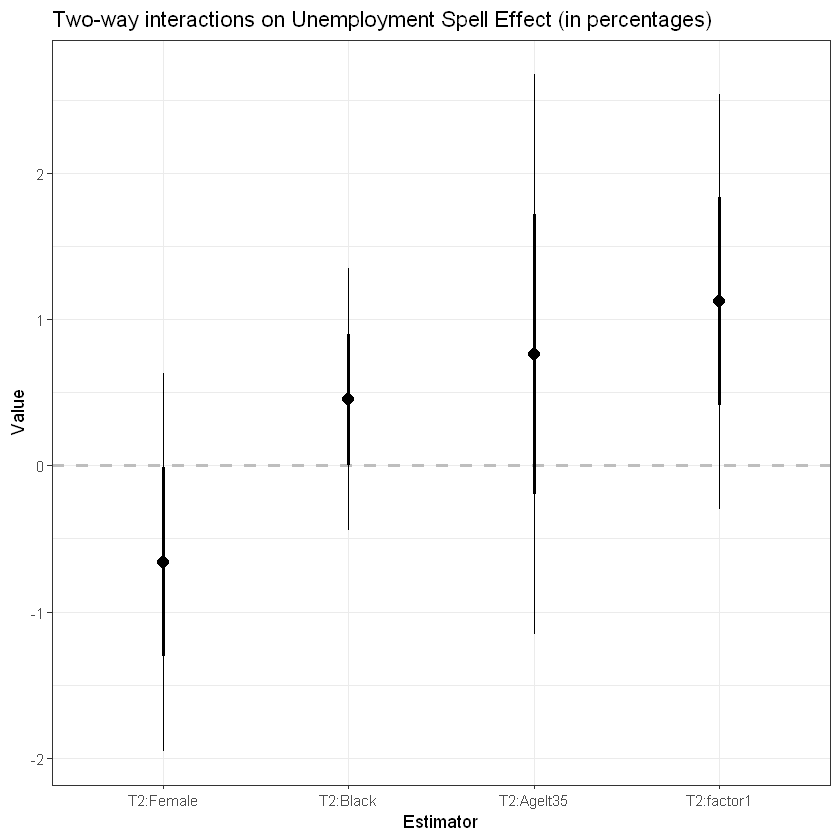

In [123]:
install.packages("coefplot")
library(coefplot)
ols.ira_reg = lm(log(inuidur1) ~ T2*X)
coefplot(ols.ira_reg, coefficients = c('T2:Xfemale' ,'T2:Xblack','T2:Xagelt35','T2:Xfactor(dep)1'), y="Estimator", horizontal=TRUE , color = "black" ,  
         title = "Two-way interactions on Unemployment Spell Effect (in percentages)") + theme_bw() + scale_y_discrete(labels=c("T2:Female", "T2:Black", "T2:Agelt35", "T2:factor1"))


As seen in the graph, the table show us that all 4 heteregonuos effects are not statiscally significant at 5%. Graphically, we can see that 0 does belong to the IC. However, it is worth noting that T2*factor1 is statiscally significant at 10%. 